In [2]:
%load_ext autoreload
%autoreload 2
%cd ..

c:\Users\troosma\Documents\Ylikool\6. semester\Bakatöö\bakatoo


In [3]:
import sys

import numpy as np
import random 
import tensorflow as tf

from tensorflow import keras
from keras import layers

from matplotlib import pyplot as plt

from scripts.CustomCallbacks import CustomLogger
import scripts.utils as utils
import scripts.Slopes as Slopes

utils.reset_seeds(0)

In [10]:
# working, keep a working copy and do not touchy touchy

def neg_log_likelihood(y_true, y_predicted):

    y_pred_mean, y_pred_sd = y_predicted[:, 0:1], y_predicted[:, 1:]

    # y_pred_sd ongi log variance
    return tf.reduce_mean(y_pred_sd + tf.math.square((y_pred_mean - y_true) / tf.math.exp(y_pred_sd)))


Epoch:   0 | Loss: 2.69783e-01
Epoch: 100 | Loss: -6.47011e-01
Epoch: 200 | Loss: -2.01099e+00
Epoch: 300 | Loss: -2.45542e+00
Epoch: 400 | Loss: -2.70773e+00
Epoch: 500 | Loss: -2.85148e+00
Epoch: 600 | Loss: -2.89733e+00
Epoch: 700 | Loss: -3.00538e+00
Epoch: 800 | Loss: -2.88468e+00
Epoch: 900 | Loss: -3.03792e+00
313/313 [==============================] - 1s 2ms/step
model contains 7 breaks
313/313 [==============================] - 1s 2ms/step


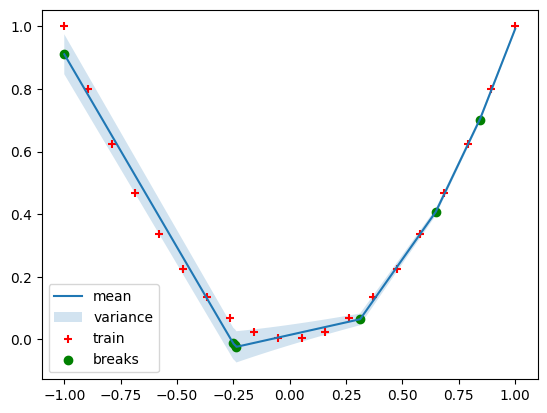

In [96]:
utils.reset_seeds(2002)

model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=5, activation='relu', name="layer_1"),
    layers.Dense(units=5, activation='relu', name="layer_2"),
    # layers.Dense(units=100, activation='relu', name="layer_2b"),
    layers.Dense(units=2, activation='linear', name="layer_3")#, kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)),
])
# last_layer = model.get_layer('layer_3')
# l_w = last_layer.get_weights()


X = np.linspace(-1, 1, 20)
y = X**2 #+ np.random.normal(0, 0.03, size=X.shape)
X_train, y_train = X, y
X_valid, y_valid = np.linspace(-1, 1, 10000), np.linspace(-1, 1, 10000)**2

model.compile(
    optimizer=keras.optimizers.Adam(
       learning_rate=0.001, amsgrad=True, epsilon=0.001),
    loss=neg_log_likelihood,
    # metrics=[keras.metrics.MeanSquaredError()],
)

h = model.fit(X, y, batch_size=8, epochs=1000, verbose=0,
                callbacks=[CustomLogger(100)], shuffle=True)


utils.joonista_variance(model, X_valid, X_train, y_train)

Epoch:   0 | Loss: 3.00052e-01
Epoch: 100 | Loss: -6.44407e-01
Epoch: 200 | Loss: -1.19132e+00
Epoch: 300 | Loss: -1.21858e+00
Epoch: 400 | Loss: -1.23638e+00
Epoch: 500 | Loss: -1.27360e+00
Epoch: 600 | Loss: -1.31767e+00
Epoch: 700 | Loss: -1.35862e+00
Epoch: 800 | Loss: -1.37786e+00
Epoch: 900 | Loss: -1.39310e+00
Epoch: 1000 | Loss: -1.40157e+00
Epoch: 1100 | Loss: -1.41401e+00
Epoch: 1200 | Loss: -1.41744e+00
Epoch: 1300 | Loss: -1.43115e+00
Epoch: 1400 | Loss: -1.43646e+00
Epoch: 1500 | Loss: -1.44919e+00
Epoch: 1600 | Loss: -1.44369e+00
Epoch: 1700 | Loss: -1.46123e+00
Epoch: 1800 | Loss: -1.47105e+00
Epoch: 1900 | Loss: -1.50712e+00
313/313 [==============================] - 1s 2ms/step
model contains 10 breaks
313/313 [==============================] - 0s 1ms/step


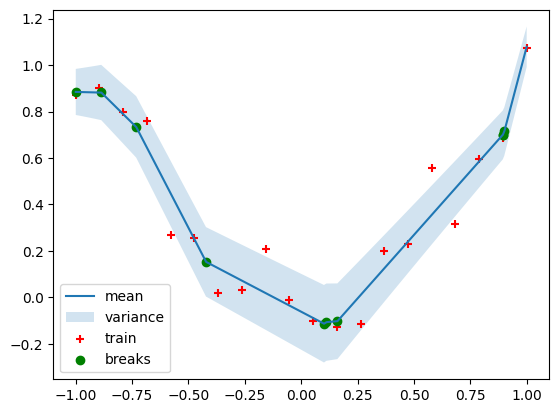

In [100]:
utils.reset_seeds(2002)

model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=5, activation='relu', name="layer_1"),
    layers.Dense(units=5, activation='relu', name="layer_2"),
    # layers.Dense(units=100, activation='relu', name="layer_2b"),
    layers.Dense(units=2, activation='linear', name="layer_3")#, kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)),
])
# last_layer = model.get_layer('layer_3')
# l_w = last_layer.get_weights()


X = np.linspace(-1, 1, 20)
y = X**2 + np.random.normal(0, 0.1, size=X.shape)
X_train, y_train = X, y
X_valid, y_valid = np.linspace(-1, 1, 10000), np.linspace(-1, 1, 10000)**2

model.compile(
    optimizer=keras.optimizers.Adam(
       learning_rate=0.001, amsgrad=True, epsilon=0.001),
    loss=neg_log_likelihood,
    # metrics=[keras.metrics.MeanSquaredError()],
)

h = model.fit(X, y, batch_size=8, epochs=2000, verbose=0,
                callbacks=[CustomLogger(100)], shuffle=True)


utils.joonista_variance(model, X_valid, X_train, y_train)

Epoch:   0 | Loss: 4.00293e-01
Epoch: 100 | Loss: -2.42255e+00
Epoch: 200 | Loss: -2.68754e+00
Epoch: 300 | Loss: -2.95546e+00
Epoch: 400 | Loss: -3.01545e+00
Epoch: 500 | Loss: -2.96000e+00
Epoch: 600 | Loss: -3.08882e+00
Epoch: 700 | Loss: -3.15242e+00
Epoch: 800 | Loss: -3.18460e+00
Epoch: 900 | Loss: -3.18766e+00
Epoch: 1000 | Loss: -3.16450e+00
Epoch: 1100 | Loss: -3.20796e+00
Epoch: 1200 | Loss: -3.20847e+00
Epoch: 1300 | Loss: -3.15807e+00
Epoch: 1400 | Loss: -3.21210e+00
Epoch: 1500 | Loss: -3.20497e+00
Epoch: 1600 | Loss: -3.26248e+00
Epoch: 1700 | Loss: -3.25572e+00
Epoch: 1800 | Loss: -3.25111e+00
Epoch: 1900 | Loss: -3.28110e+00
313/313 [==============================] - 1s 2ms/step
model contains 9 breaks
313/313 [==============================] - 1s 2ms/step


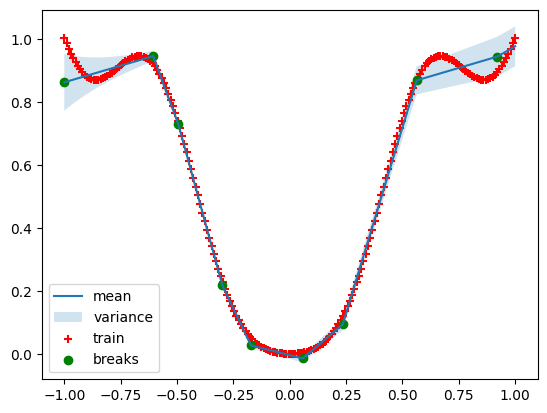

In [196]:
utils.reset_seeds(2002)

model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=5, activation='relu', name="layer_1"),
    layers.Dense(units=5, activation='relu', name="layer_2"),
    # layers.Dense(units=100, activation='relu', name="layer_2b"),
    layers.Dense(units=2, activation='linear', name="layer_3")#, kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)),
])
# last_layer = model.get_layer('layer_3')
# l_w = last_layer.get_weights()


X = np.linspace(-1, 1, 200)
y = X * np.sin(3*X)**3 + X**2 #+ np.random.normal(0, 0.1, size=X.shape)
X_train, y_train = X, y
X_valid, y_valid = np.linspace(-1, 1, 10000), np.linspace(-1, 1, 10000)**2

model.compile(
    optimizer=keras.optimizers.Adam(
       learning_rate=0.001, amsgrad=True, epsilon=0.001),
    loss=neg_log_likelihood,
    # metrics=[keras.metrics.MeanSquaredError()],
)

h = model.fit(X, y, batch_size=8, epochs=2000, verbose=0,
                callbacks=[CustomLogger(100)], shuffle=True)


utils.joonista_variance(model, X_valid, X_train, y_train)

## Erinevas kohas on erineva tihedusega

Epoch:   0 | Loss: 2.71887e-01
Epoch: 100 | Loss: -1.04081e+00
Epoch: 200 | Loss: -2.71536e+00
Epoch: 300 | Loss: -3.20079e+00
Epoch: 400 | Loss: -3.36861e+00
Epoch: 500 | Loss: -3.46536e+00
Epoch: 600 | Loss: -3.64924e+00
Epoch: 700 | Loss: -3.70622e+00
Epoch: 800 | Loss: -3.65457e+00
Epoch: 900 | Loss: -3.66939e+00
313/313 [==============================] - 0s 1ms/step
model contains 8 breaks
313/313 [==============================] - 0s 1ms/step


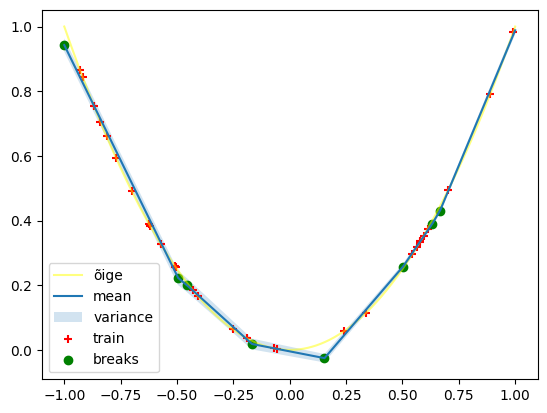

In [158]:
utils.reset_seeds(2002)

model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=5, activation='relu', name="layer_1"),
    layers.Dense(units=5, activation='relu', name="layer_2"),
    layers.Dense(units=2, activation='linear', name="layer_3")
])
# last_layer = model.get_layer('layer_3')
# l_w = last_layer.get_weights()

x1, x2, x3 = -0.8, -0.2, 0.5
X1 = np.random.normal(x1, 0.1, 10)
X2 = np.random.normal(x2, 0.2, 10)
X3 = np.random.normal(x3, 0.2, 10)
X = np.concatenate((X1, X2, X3))
y = X**2
X_train, y_train = X, y
X_valid, y_valid = np.linspace(-1, 1, 10000), np.linspace(-1, 1, 10000)**2

model.compile(
    optimizer=keras.optimizers.Adam(
       learning_rate=0.001, amsgrad=True, epsilon=0.001),
    loss=neg_log_likelihood,
    # metrics=[keras.metrics.MeanSquaredError()],
)

h = model.fit(X, y, batch_size=8, epochs=1000, verbose=0,
                callbacks=[CustomLogger(100)], shuffle=True)


utils.joonista_variance(model, X_valid, X_train, y_train, ground_truth=True)

## Erinevas kohas on erineva suurusega müra

In [8]:
def train_data_maker(elements:list[tuple[float, float, float, float]], fn=lambda x: x**2) -> tuple[np.array, np.array]:
    """Loob treeningandmed, võtab sisse listi, kus iga element on tuple:
        - mean
        - std
        - n_samples
        - noise_std

    :param elements: list of tuples, where each tuple is (mean, std, n_samples, noise_std)
    :param fn: f(x), funktsioon, defaults to lambdax:x**2
    :return: treeningandmed
    """    
    X, y = [], []
    for el in elements:
        xi = np.random.normal(el[0], el[1], el[2])
        yi = fn(xi) + np.random.normal(0, el[3], size=el[2])
        X.extend(xi)
        y.extend(yi)
    X, y = np.array(X), np.array(y)
    return X, y

utils.reset_seeds(2002)
train_data_maker([(0, 0.1, 10, 0.1), (0.5, 0.2, 10, 0.3), (1, 0.1, 10, 0.1)])

(array([-0.13056495,  0.09951862,  0.17568906,  0.29079329, -0.06851354,
         0.02995465, -0.11882236, -0.03992258,  0.18141063, -0.01240336,
         0.61118104,  0.7041462 ,  0.57885939,  0.88907262,  0.59456253,
         0.99161667,  0.33837051,  0.57955411,  0.54342469,  0.56292396,
         1.09728086,  1.10242913,  0.94913692,  0.99067229,  0.86568026,
         1.00429687,  1.06305523,  0.95511005,  1.00178913,  1.01648526]),
 array([-0.08741864, -0.14399571, -0.15548787,  0.1492624 ,  0.00923252,
         0.22202714, -0.13831495, -0.02497618, -0.08143049,  0.07223034,
         0.44791311,  0.71823234, -0.22783865,  0.62186019, -0.00912975,
         0.86651452,  0.19581978, -0.00950576,  0.96222928,  0.18834443,
         1.26516612,  1.33046774,  0.81375788,  0.95206637,  0.73861721,
         1.08470682,  1.2167324 ,  0.77528266,  0.88629999,  0.95824634]))

Epoch:   0 | Loss: 4.31371e-01
Epoch: 100 | Loss: -5.38895e-01
Epoch: 200 | Loss: -7.79226e-01
Epoch: 300 | Loss: -9.34164e-01
Epoch: 400 | Loss: -9.93688e-01
Epoch: 500 | Loss: -1.02036e+00
Epoch: 600 | Loss: -1.03489e+00
Epoch: 700 | Loss: -1.04237e+00
Epoch: 800 | Loss: -1.05156e+00
Epoch: 900 | Loss: -1.05787e+00
313/313 [==============================] - 1s 2ms/step
model contains 12 breaks
313/313 [==============================] - 1s 2ms/step


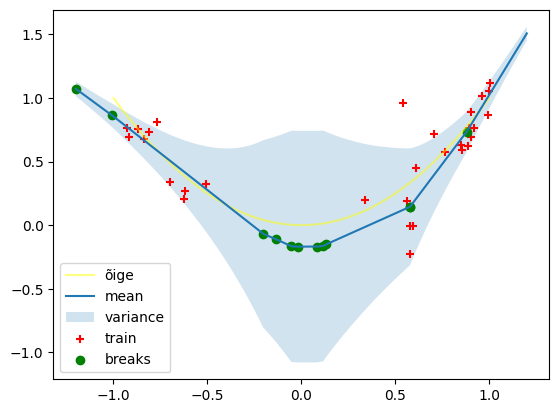

In [191]:
utils.reset_seeds(2002)

model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=5, activation='relu', name="layer_1"),
    layers.Dense(units=5, activation='relu', name="layer_2"),
    layers.Dense(units=2, activation='linear', name="layer_3")
])
X, y = train_data_maker([(-0.8, 0.1, 10, 0.1), (0.5, 0.2, 10, 0.3), (0.9, 0.1, 10, 0.1)])
X_train, y_train = X, y
X_valid, y_valid = np.linspace(-1.2, 1.2, 10000), np.linspace(-1.2, 1.2, 10000)**2

model.compile(
    optimizer=keras.optimizers.Adam(
       learning_rate=0.001, amsgrad=True, epsilon=0.001),
    loss=neg_log_likelihood,
    # metrics=[keras.metrics.MeanSquaredError()],
)

h = model.fit(X, y, batch_size=8, epochs=1000, verbose=0,
                callbacks=[CustomLogger(100)], shuffle=True)


utils.joonista_variance(model, X_valid, X_train, y_train, ground_truth=True)

mitu punkti on vaja keskele lisada enne kui keskel hakkab variance väiksemaks minema? (visuaalne)
- 2ga ei näe vahet (out of 32)
- 5ga ei ole kasu (out of 35p)
- 10ga tuleb suht tavaline (out of 40p)

**Murdepunktid tulid keskele ka siis kui seal ei olnud neid otseselt vaja**

Epoch:   0 | Loss: 4.04017e-01
Epoch: 100 | Loss: -5.47776e-01
Epoch: 200 | Loss: -7.95627e-01
Epoch: 300 | Loss: -9.10017e-01
Epoch: 400 | Loss: -9.47163e-01
Epoch: 500 | Loss: -9.61012e-01
Epoch: 600 | Loss: -9.68996e-01
Epoch: 700 | Loss: -9.74536e-01
Epoch: 800 | Loss: -9.79059e-01
Epoch: 900 | Loss: -9.82413e-01
Epoch: 1000 | Loss: -9.82980e-01
Epoch: 1100 | Loss: -9.87821e-01
Epoch: 1200 | Loss: -9.93567e-01
Epoch: 1300 | Loss: -9.95467e-01
Epoch: 1400 | Loss: -9.96810e-01
313/313 [==============================] - 1s 2ms/step
model contains 7 breaks
313/313 [==============================] - 0s 1ms/step


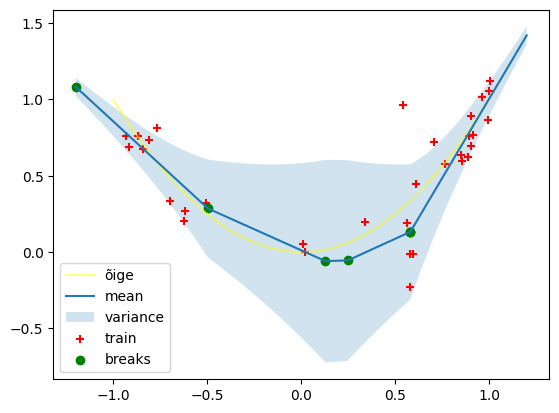

In [193]:
utils.reset_seeds(2002)

model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=5, activation='relu', name="layer_1"),
    layers.Dense(units=5, activation='relu', name="layer_2"),
    layers.Dense(units=2, activation='linear', name="layer_3")
])
X, y = train_data_maker([
    (-0.8, 0.1, 10, 0.1),
    (0.5, 0.2, 10, 0.3),
    (0.9, 0.1, 10, 0.1),
    (0, 0.1, 2, 0.05)])

X_train, y_train = X, y
X_valid, y_valid = np.linspace(-1.2, 1.2,
                               10000), np.linspace(-1.2, 1.2, 10000)**2

model.compile(
    optimizer=keras.optimizers.Adam(
        learning_rate=0.001, amsgrad=True, epsilon=0.001),
    loss=neg_log_likelihood,
    # metrics=[keras.metrics.MeanSquaredError()],
)

h = model.fit(X, y, batch_size=8, epochs=1500, verbose=0,
              callbacks=[CustomLogger(100)], shuffle=True)


utils.joonista_variance(model, X_valid, X_train, y_train, ground_truth=True)


Epoch:   0 | Loss: 3.69987e-01
Epoch: 100 | Loss: -5.82601e-01
Epoch: 200 | Loss: -7.91322e-01
Epoch: 300 | Loss: -8.71725e-01
Epoch: 400 | Loss: -9.04811e-01
Epoch: 500 | Loss: -9.14991e-01
Epoch: 600 | Loss: -9.21957e-01
Epoch: 700 | Loss: -9.36536e-01
Epoch: 800 | Loss: -9.40788e-01
Epoch: 900 | Loss: -9.45861e-01
Epoch: 1000 | Loss: -9.58482e-01
Epoch: 1100 | Loss: -9.62272e-01
Epoch: 1200 | Loss: -9.73250e-01
Epoch: 1300 | Loss: -9.75461e-01
Epoch: 1400 | Loss: -9.86244e-01
313/313 [==============================] - 1s 1ms/step
model contains 7 breaks
313/313 [==============================] - 1s 2ms/step


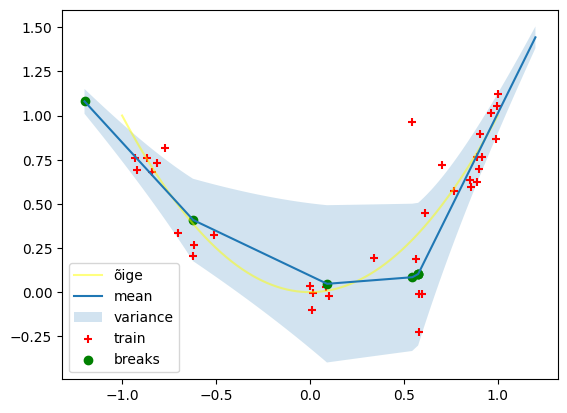

In [194]:
utils.reset_seeds(2002)

model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=5, activation='relu', name="layer_1"),
    layers.Dense(units=5, activation='relu', name="layer_2"),
    layers.Dense(units=2, activation='linear', name="layer_3")
])
X, y = train_data_maker([
    (-0.8, 0.1, 10, 0.1),
    (0.5, 0.2, 10, 0.3),
    (0.9, 0.1, 10, 0.1),
    (0, 0.1, 5, 0.05)])

X_train, y_train = X, y
X_valid, y_valid = np.linspace(-1.2, 1.2,
                               10000), np.linspace(-1.2, 1.2, 10000)**2

model.compile(
    optimizer=keras.optimizers.Adam(
        learning_rate=0.001, amsgrad=True, epsilon=0.001),
    loss=neg_log_likelihood,
    # metrics=[keras.metrics.MeanSquaredError()],
)

h = model.fit(X, y, batch_size=8, epochs=1500, verbose=0,
              callbacks=[CustomLogger(100)], shuffle=True)


utils.joonista_variance(model, X_valid, X_train, y_train, ground_truth=True)


Epoch:   0 | Loss: 1.38363e-01
Epoch: 100 | Loss: -1.28509e+00
Epoch: 200 | Loss: -1.48179e+00
Epoch: 300 | Loss: -1.56309e+00
Epoch: 400 | Loss: -1.62864e+00
Epoch: 500 | Loss: -1.66486e+00
Epoch: 600 | Loss: -1.69349e+00
Epoch: 700 | Loss: -1.71617e+00
Epoch: 800 | Loss: -1.74503e+00
Epoch: 900 | Loss: -1.75780e+00
Epoch: 1000 | Loss: -1.78864e+00
Epoch: 1100 | Loss: -1.80012e+00
Epoch: 1200 | Loss: -1.80962e+00
Epoch: 1300 | Loss: -1.81670e+00
Epoch: 1400 | Loss: -1.81967e+00
313/313 [==============================] - 2s 6ms/step
model contains 9 breaks
313/313 [==============================] - 2s 5ms/step


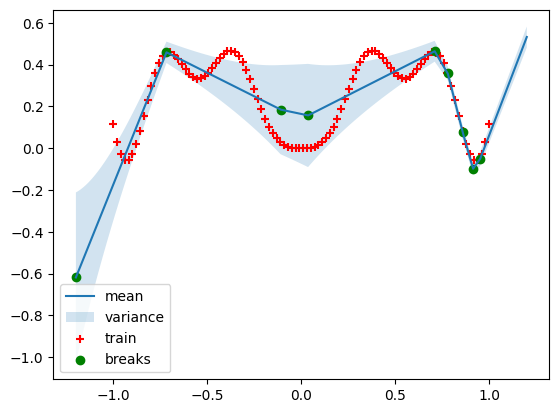

In [13]:
utils.reset_seeds(2002)

model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(units=5, activation='relu', name="layer_1"),
    layers.Dense(units=5, activation='relu', name="layer_2"),
    layers.Dense(units=2, activation='linear', name="layer_3")
])
X, y = train_data_maker([
    (-0.8, 0.1, 10, 0.1),
    (0.5, 0.2, 10, 0.3),
    (0.9, 0.1, 10, 0.1),
    (0, 0.1, 10, 0.05)], fn=lambda X: X * np.sin(5*X)**3 + X**2)
    
X = np.linspace(-1, 1, 100)
y = X * np.sin(5*X)**3 + X**2
X_train, y_train = X, y
X_valid, y_valid = np.linspace(-1.2, 1.2,
                               10000), np.linspace(-1.2, 1.2, 10000)**2

model.compile(
    optimizer=keras.optimizers.Adam(
        learning_rate=0.001, amsgrad=True, epsilon=0.001),
    loss=neg_log_likelihood,
    # metrics=[keras.metrics.MeanSquaredError()],
)

h = model.fit(X, y, batch_size=8, epochs=1500, verbose=0,
              callbacks=[CustomLogger(100)], shuffle=True)


utils.joonista_variance(model, X_valid, X_train, y_train, ground_truth=False)


313/313 [==============================] - 2s 5ms/step
model contains 9 breaks
313/313 [==============================] - 2s 5ms/step


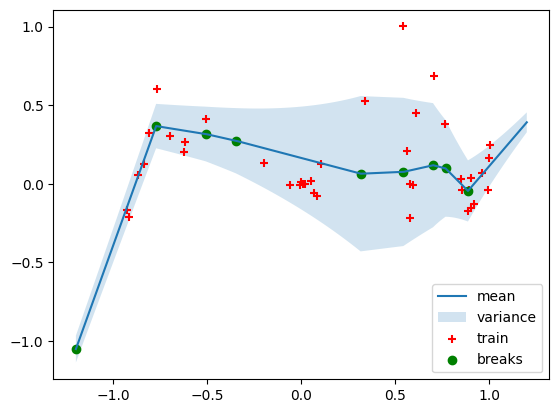

In [12]:
utils.joonista_variance(model, X_valid, X_train, y_train, ground_truth=False)


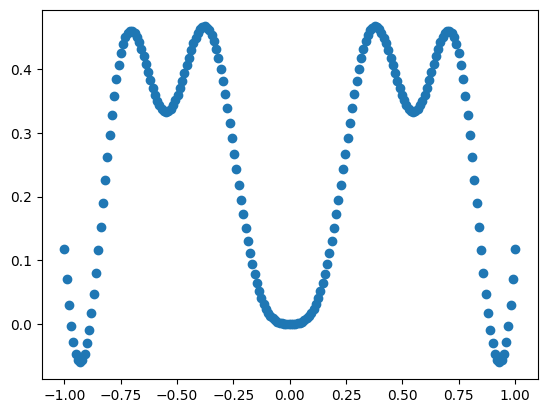

In [6]:
X = np.linspace(-1, 1, 200)
#y= 1 * np.sin(1 / (X + 12))
y = X * np.sin(5*X)**3 + X**2# + np.random.normal(0, 0.1, size=X.shape)

plt.scatter(X, y)